# artist_photosize_survey_v2

이 노트북은 dataset의 image들의 크기를 모두 수집하여 해당 그림을 그린 artist를 label로 시각화합니다. 

### Import library

In [16]:
import glob
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

### Load image info list

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,img_path,artist
0,0,./train/0000.jpg,Diego Velazquez
1,1,./train/0001.jpg,Vincent van Gogh
2,2,./train/0002.jpg,Claude Monet
3,3,./train/0003.jpg,Edgar Degas
4,4,./train/0004.jpg,Hieronymus Bosch


### Load all image and get each image size

In [5]:
h_lst = []
w_lst = []
for i in range(len(df)):
    img = cv2.imread(os.path.join('../data', df['img_path'][i]))
    h, w, _ = img.shape
    h_lst.append(h)
    w_lst.append(w)
df['w'] = w_lst
df['h'] = h_lst
df.head()


,id,img_path,artist,w,h
0,0,./train/0000.jpg,Diego Velazquez,1024,1300
1,1,./train/0001.jpg,Vincent van Gogh,568,1024
2,2,./train/0002.jpg,Claude Monet,1024,722
3,3,./train/0003.jpg,Edgar Degas,1053,836
4,4,./train/0004.jpg,Hieronymus Bosch,782,845


### Data visualization
 - x : image width
 - y : image height
 - color : artist

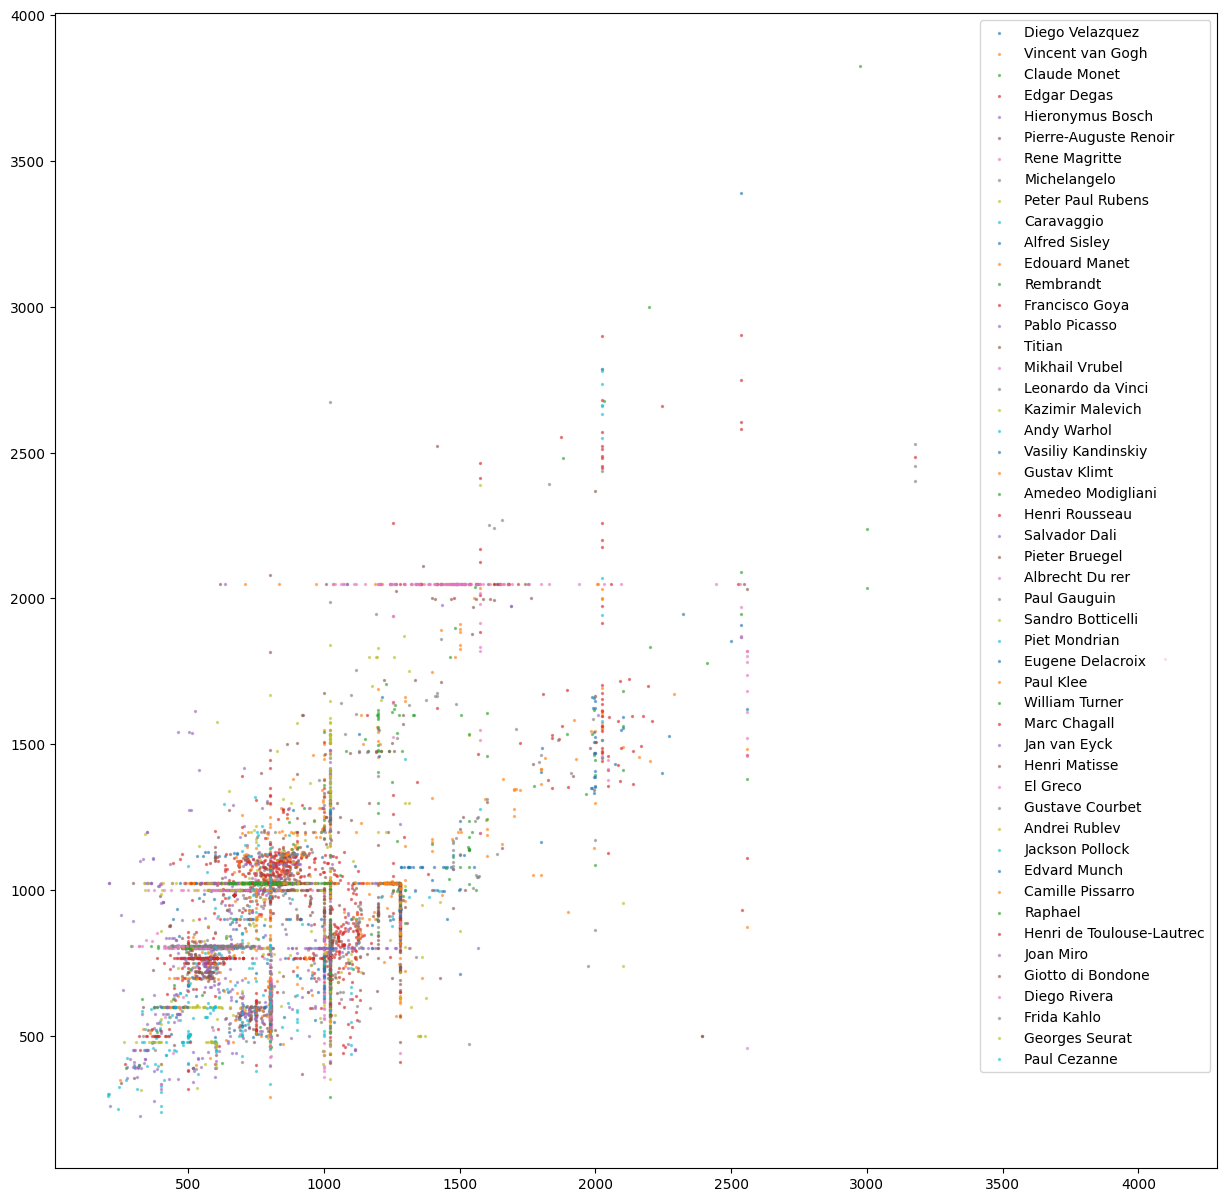

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
for idx, name in enumerate(df['artist'].unique()):
    df_tmp = df[df['artist']==name]
    axes.scatter(
        data=df_tmp,
        x='w',
        y='h',
        label=name,
        alpha=0.5,
        s = 2.0
    )
plt.legend()